## Problem Statement

A digital media company (eg: hotstar,netflix) had launched a show, initially the show got a 
good reponse, but then witnessed a decline in viewership. the company wants to figure
out what went wrong.

__Approach:__
we are concerned about determining the driver variable for show veiwership.
This is the case of prediction rather than projection where we are more intrested 
the key driver varaibles and their impact rather than forecasting the results

First we will list down the potential reasons for decline in viewership
Potential reasons could be:

1. decline in no.of people coming to the platform
2. Fewer people watching the vedio
3. A decrease in marketing spend?
4. Competitive shows eg:Cricket/IPL
5. Special Holidays


__Data__
1. we have been given data fro the period 1st march 2017 to 19th may 2017
2. view_show: no.of time the show was viewed
3. visitors: no.of visitors who browsed the platform, but not necessarily watched  a vedio
4. views_platform : no.of time a vedio was viewed on the platform
5. Ad_impression : proxy of marketing budget, represents the no.of impressions generated by ads
6. cricket_match_india : if a cricket match was being played 1 indicates match on a given day, 0 indicated there wasn't any match
7. character_A : Describes presence of character A. 1 indicates character A was in the episode, 0 indicates he/she wasn't

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mediacompany.csv')
df.head(10)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN
5,3/6/2017,342997,1330689,1742540,1140228426,0,0,NaN
6,3/7/2017,227313,1363579,1821742,1113811802,0,0,NaN
7,3/8/2017,180313,1353483,1795456,1083475096,0,0,NaN
8,3/9/2017,178800,1345428,1794157,1067636147,0,0,NaN
9,3/10/2017,201180,1344540,1834967,1081234843,0,0,NaN


In [3]:
df.shape

(80, 8)

In [4]:
# cheking duplicates
df.duplicated().sum()

np.int64(0)

In [5]:
# removing the un neccesary columns
df = df.drop('Unnamed: 7',axis = 1)

In [6]:
df.columns

Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A'],
      dtype='object')

In [7]:
# explore top 5 rows
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [8]:
# Data inspection
df.shape

(80, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 80 non-null     object
 1   Views_show           80 non-null     int64 
 2   Visitors             80 non-null     int64 
 3   Views_platform       80 non-null     int64 
 4   Ad_impression        80 non-null     int64 
 5   Cricket_match_india  80 non-null     int64 
 6   Character_A          80 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


In [10]:
df.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000


In [11]:
# Data Cleaning
df.isna().sum() # cheking for null values

Date                   0
Views_show             0
Visitors               0
Views_platform         0
Ad_impression          0
Cricket_match_india    0
Character_A            0
dtype: int64

<Axes: ylabel='Ad_impression'>

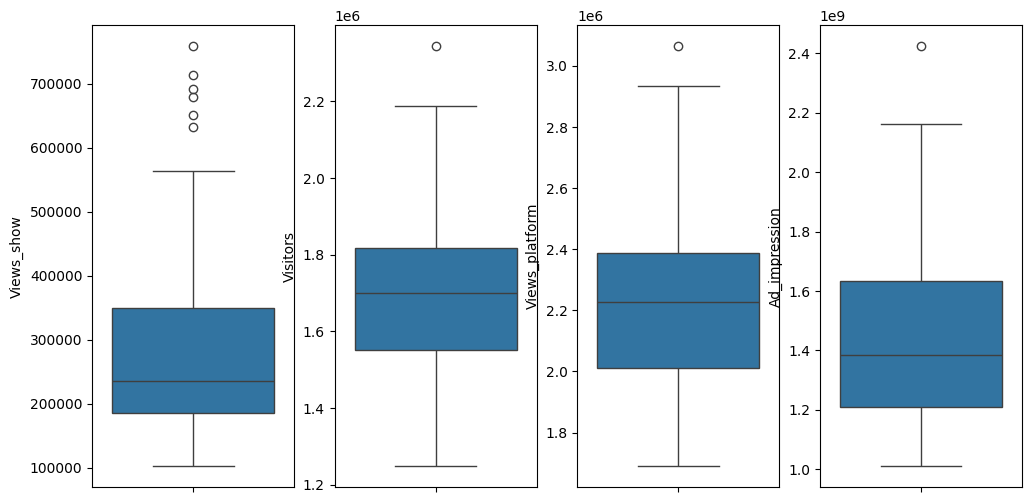

In [12]:
# checking for outliers by doing boxplot
plt.figure(figsize = (12,6))

plt.subplot(1,4,1)
sns.boxplot(df['Views_show'])


plt.subplot(1,4,2)
sns.boxplot(df['Visitors'])

plt.subplot(1,4,3)
sns.boxplot(df['Views_platform'])

plt.subplot(1,4,4)
sns.boxplot(df['Ad_impression'])

In [13]:
# Data preparation
# converting data to pandas datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 80 non-null     datetime64[ns]
 1   Views_show           80 non-null     int64         
 2   Visitors             80 non-null     int64         
 3   Views_platform       80 non-null     int64         
 4   Ad_impression        80 non-null     int64         
 5   Cricket_match_india  80 non-null     int64         
 6   Character_A          80 non-null     int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 4.5 KB


In [15]:
# deriving date, matrices
# derive week column from date
df['Day_of_week'] = df['Date'].dt.dayofweek

In [16]:
df.head(10)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_of_week
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6
5,2017-03-06,342997,1330689,1742540,1140228426,0,0,0
6,2017-03-07,227313,1363579,1821742,1113811802,0,0,1
7,2017-03-08,180313,1353483,1795456,1083475096,0,0,2
8,2017-03-09,178800,1345428,1794157,1067636147,0,0,3
9,2017-03-10,201180,1344540,1834967,1081234843,0,0,4


<Axes: xlabel='Date'>

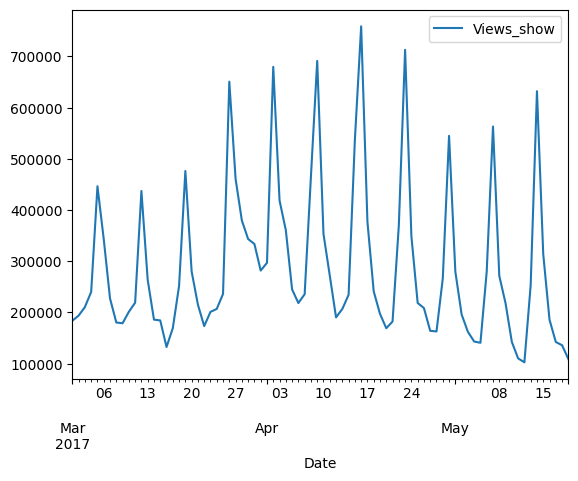

In [17]:
# eda
# univarient analysis
# days vs views_show
df.plot.line(x = 'Date',y = 'Views_show')

<Axes: xlabel='Day_of_week', ylabel='Views_show'>

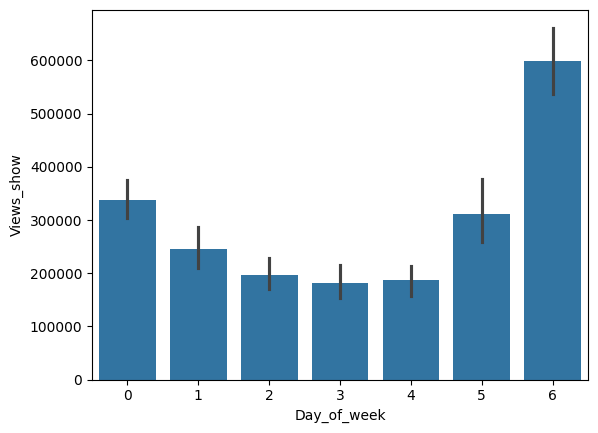

In [18]:
sns.barplot(x = df['Day_of_week'],y = df['Views_show'])

__inference__: views are more on saturday and sunday and declined on week days

* hence we can think of another matrix 'weekend':1 and 'weekdays':0

In [19]:
dict_days = {0:1,6:1,2:0,3:0,4:0,5:0,1:0}
df['weekend'] = df['Day_of_week'].map(dict_days)
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_of_week,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6,1


<Axes: xlabel='weekend', ylabel='Views_show'>

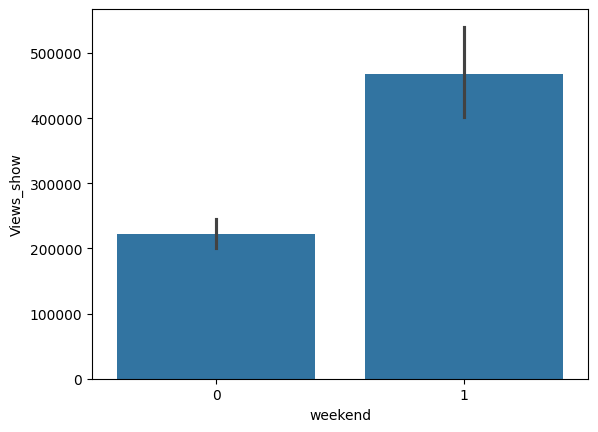

In [20]:
# weekend vs view_show using barplot
sns.barplot(x = df['weekend'],y = df['Views_show'])

In [21]:
# inference: higher viewership on weekends

In [22]:
# plot for Date vs views_show and days vs Ad_impressions

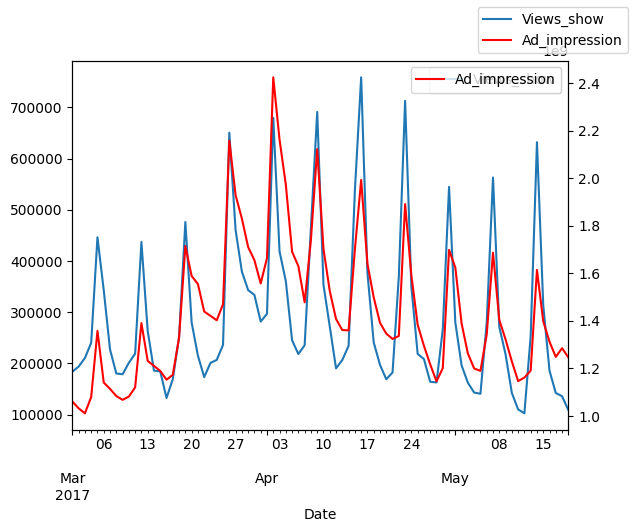

In [23]:
ax = df.plot(x = 'Date', y = 'Views_show')
ax2 = ax.twinx()
df.plot(x = 'Date', y = 'Ad_impression',ax = ax2,color = 'red')
ax.figure.legend()

In [24]:
# ad_impressions and view_show 

<Axes: xlabel='Ad_impression', ylabel='Views_show'>

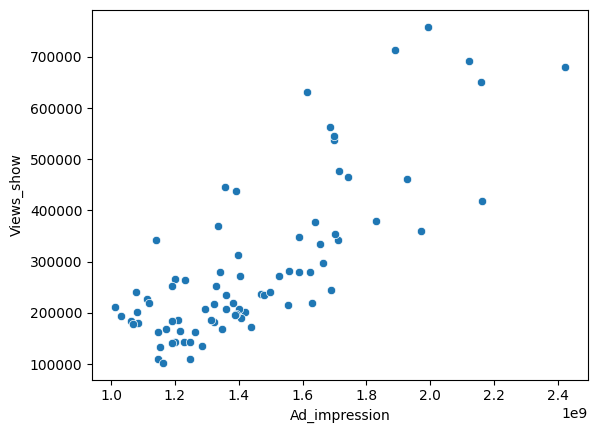

In [25]:
sns.scatterplot(x = df['Ad_impression'],y = df['Views_show'])

In [26]:
# we can see that as ad impressions increases view_show also increases

In [27]:
# scattot plot for visitors vs view_shows

<Axes: xlabel='Visitors', ylabel='Views_show'>

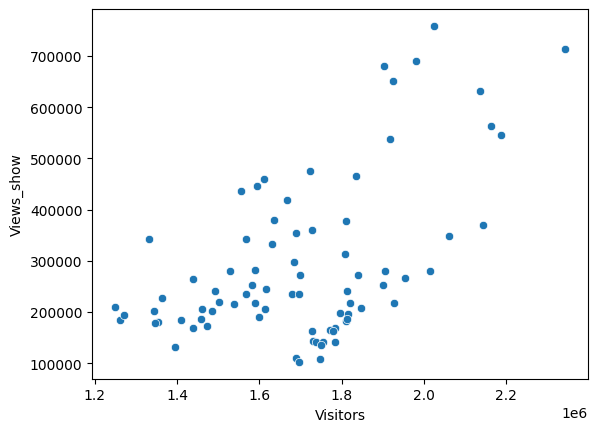

In [28]:
sns.scatterplot(x = df['Visitors'],y = df['Views_show'])

In [29]:
# inference: show views are some what proportional realted to platform views

<Axes: xlabel='Cricket_match_india', ylabel='Views_show'>

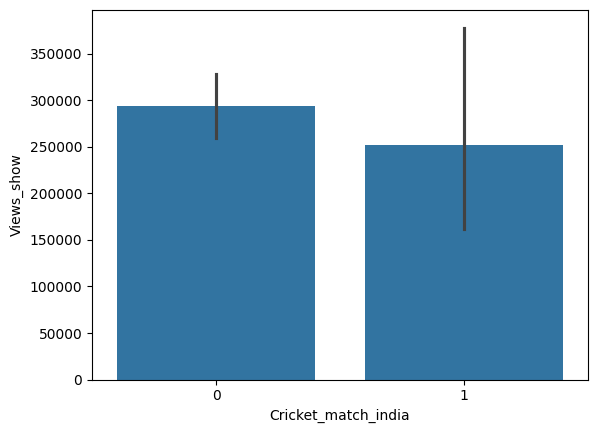

In [30]:
sns.barplot(x = df['Cricket_match_india'],y = df['Views_show'])

inferences: when there is cricket match view of the shows is decreasing


<Axes: xlabel='Character_A', ylabel='Views_show'>

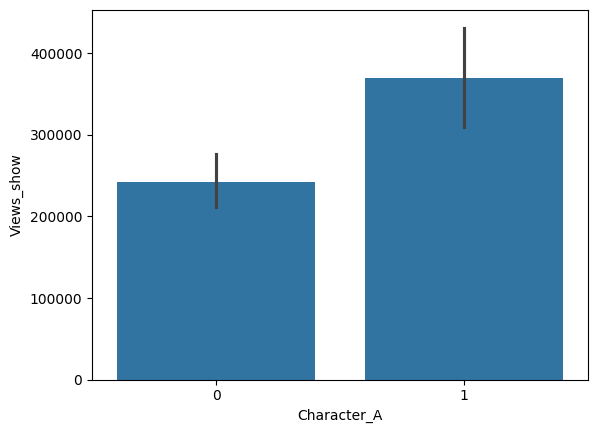

In [32]:
sns.barplot(x = df['Character_A'],y = df['Views_show'])

inference: When there is character A the views of the show increases

In [35]:
df.dtypes


Date                   datetime64[ns]
Views_show                      int64
Visitors                        int64
Views_platform                  int64
Ad_impression                   int64
Cricket_match_india             int64
Character_A                     int64
Day_of_week                     int32
weekend                         int64
dtype: object

In [38]:
# model scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_var = ['Views_show','Visitors','Views_platform','Ad_impression']
df[num_var] = scaler.fit_transform(df[num_var])


In [39]:
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_of_week,weekend
0,2017-03-01,0.123787,0.010985,0.011466,0.035372,0,0,2,0
1,2017-03-02,0.139066,0.020409,0.000000,0.014844,0,0,3,0
2,2017-03-03,0.164544,0.000000,0.025792,0.000000,0,0,4,0
3,2017-03-04,0.209631,0.223199,0.119842,0.048345,1,0,5,0
4,2017-03-05,0.523988,0.316041,0.255290,0.245426,0,0,6,1


In [40]:
# lets check the correlation coefficient to see which variable are hightly correlated

<Axes: >

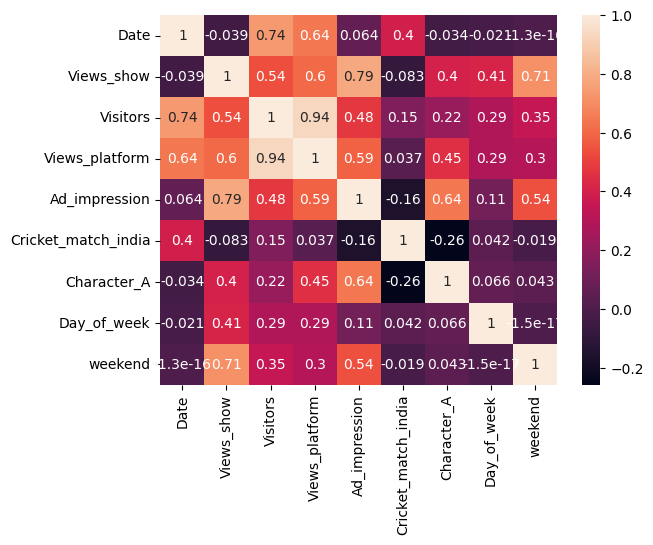

In [41]:
sns.heatmap(df.corr(),annot = True)

In [42]:
 # running first model (lm1) visistors, weekend

In [45]:
X = df[['Visitors','weekend']]
y = df['Views_show']

In [46]:
from sklearn.linear_model import LinearRegression


In [47]:
# create a liner Regression object
lm = LinearRegression()

In [48]:
# fit the model to the training data
lm.fit(X,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [53]:
import statsmodels.api as sm
X = sm.add_constant(X)
lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     58.45
Date:                Sat, 10 Jan 2026   Prob (F-statistic):           3.62e-16
Time:                        11:09:55   Log-Likelihood:                 39.400
No. Observations:                  80   AIC:                            -72.80
Df Residuals:                      77   BIC:                            -65.65
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0485      0.037      1.305      0.1

In [ ]:
# lm2- visistors  weekend character a

In [56]:
X = df[['Visitors','weekend','Character_A']]

# splitting reponse variable to y
y = df['Views_show']

In [58]:
import statsmodels.api as sm
X = sm.add_constant(X)
lm2 = sm.OLS(y,X).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     59.12
Date:                Sat, 10 Jan 2026   Prob (F-statistic):           7.94e-20
Time:                        11:39:13   Log-Likelihood:                 50.624
No. Observations:                  80   AIC:                            -93.25
Df Residuals:                      76   BIC:                            -83.72
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0234      0.033      0.711      

In [61]:
X = df[['weekend','Character_A','Views_platform']]
y = df['Views_show']

In [62]:
import statsmodels.api as sm
X = sm.add_constant(X)
lm3 = sm.OLS(y,X).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     65.14
Date:                Sat, 10 Jan 2026   Prob (F-statistic):           5.90e-21
Time:                        11:42:56   Log-Likelihood:                 53.376
No. Observations:                  80   AIC:                            -98.75
Df Residuals:                      76   BIC:                            -89.22
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0184      0.030      0.

In [63]:
X = df[['weekend','Character_A','Ad_impression']]
y = df['Views_show']

In [64]:
import statsmodels.api as sm
X = sm.add_constant(X)
lm4 = sm.OLS(y,X).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     70.61
Date:                Sat, 10 Jan 2026   Prob (F-statistic):           6.38e-22
Time:                        11:45:53   Log-Likelihood:                 55.727
No. Observations:                  80   AIC:                            -103.5
Df Residuals:                      76   BIC:                            -93.93
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0362      0.025      1.444

In [65]:
X = df[['weekend','Character_A','Ad_impression']]
X = sm.add_constant(X)
Predicted_views = lm3.predict(X)

In [66]:
Predicted_views

0     0.030926
1     0.023660
2     0.018406
3     0.035517
4     0.425181
        ...   
75    0.435277
76    0.093810
77    0.077859
78    0.087023
79    0.077298
Length: 80, dtype: float64

In [70]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(df.Views_show,Predicted_views)
r_squared  = r2_score(df.Views_show,Predicted_views)

In [71]:
print(mse)
print(r_squared)

0.01664259851719051
0.6977269328569253


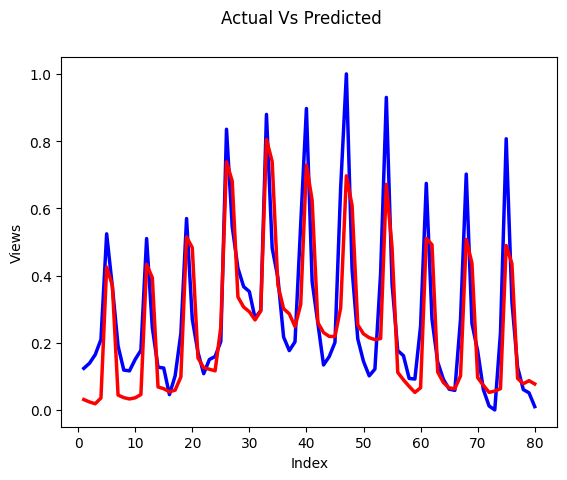

In [75]:
# actual vs predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,df.Views_show,color = 'blue',linewidth = 2.5,linestyle = '-')
plt.plot(c,Predicted_views,color = 'red',linewidth= 2.5,linestyle= '-')
fig.suptitle('Actual Vs Predicted')
plt.xlabel('Index')
plt.ylabel('Views')
plt.show()

In [ ]:
# # inferences 
# # Ad impressions and Character A as the driver variables that could explain the viewership pattern.
# Based on the industry , ad impression are directly proportional to marketing budget.
# thus by increasing marketing budget a better viewership could be achieved

# similarly character A's presence brings viewrs to the show
# thus these two variables could be acted upon to improve show viewership